##### Here's link you can find dataset ---> 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv', nrows=500000)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   srch_id                      500000 non-null  int64  
 1   date_time                    500000 non-null  object 
 2   site_id                      500000 non-null  int64  
 3   visitor_location_country_id  500000 non-null  int64  
 4   visitor_hist_starrating      25751 non-null   float64
 5   visitor_hist_adr_usd         25899 non-null   float64
 6   prop_country_id              500000 non-null  int64  
 7   prop_id                      500000 non-null  int64  
 8   prop_starrating              500000 non-null  int64  
 9   prop_review_score            499300 non-null  float64
 10  prop_brand_bool              500000 non-null  int64  
 11  prop_location_score1         500000 non-null  float64
 12  prop_location_score2         390302 non-null  float64
 13 

In [4]:
df.shape[0]

500000

In [5]:
df.isna().sum()

srch_id                             0
date_time                           0
site_id                             0
visitor_location_country_id         0
visitor_hist_starrating        474249
visitor_hist_adr_usd           474101
prop_country_id                     0
prop_id                             0
prop_starrating                     0
prop_review_score                 700
prop_brand_bool                     0
prop_location_score1                0
prop_location_score2           109698
prop_log_historical_price           0
position                            0
price_usd                           0
promotion_flag                      0
srch_destination_id                 0
srch_length_of_stay                 0
srch_booking_window                 0
srch_adults_count                   0
srch_children_count                 0
srch_room_count                     0
srch_saturday_night_bool            0
srch_query_affinity_score      467441
orig_destination_distance      160871
random_bool 

In [6]:
def fill_mean(column):
    column = column.fillna(column.mean())
    return column

In [7]:
#prop_review_score is mean review score of the hotel, so we are filling it with mean()

df['prop_review_score'] = fill_mean(df['prop_review_score'])

In [8]:
#fill 0 to every NaN values

df.fillna(0, inplace=True)

In [9]:
# prop_location_score2 is second score of desirability of hotel so we will drop that column
df.drop('prop_location_score2', axis=1, inplace=True)


# Remove date_item column since it will not add any value to our clustering
df.drop('date_time', axis=1, inplace=True)

In [10]:
df.isna().sum()

srch_id                        0
site_id                        0
visitor_location_country_id    0
visitor_hist_starrating        0
visitor_hist_adr_usd           0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
srch_query_affinity_score      0
orig_destination_distance      0
random_bool                    0
comp1_rate                     0
comp1_inv                      0
comp1_rate_percent_diff        0
comp2_rate                     0
comp2_inv                      0
comp2_rate

In [11]:
df.columns

Index(['srch_id', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_log_historical_price', 'position',
       'price_usd', 'promotion_flag', 'srch_destination_id',
       'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count',
       'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool',
       'srch_query_affinity_score', 'orig_destination_distance', 'random_bool',
       'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate',
       'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv',
       'comp7_rate_percent_di

In [12]:
# df[df.columns[-3:]]
df.drop(['click_bool','gross_bookings_usd', 'booking_bool', 'position'], inplace=True,axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc = StandardScaler()
df = sc.fit_transform(df)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=2, random_state=42)
trans_df = pca.fit_transform(df)

In [17]:
trans_df.shape

(500000, 2)

<function matplotlib.pyplot.show(*args, **kw)>

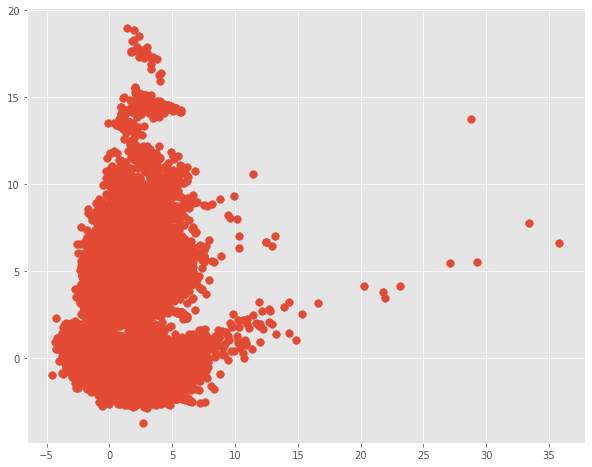

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(trans_df[:,0], trans_df[:, 1], s=60)
plt.show

In [19]:
from sklearn.cluster import KMeans

In [20]:
n_clusters = range(1, 20)
scores = []

for k in n_clusters:
    print(k)
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(trans_df)
    scores.append(kmeans.inertia_)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Text(0.5, 1.0, 'Elbow curve')

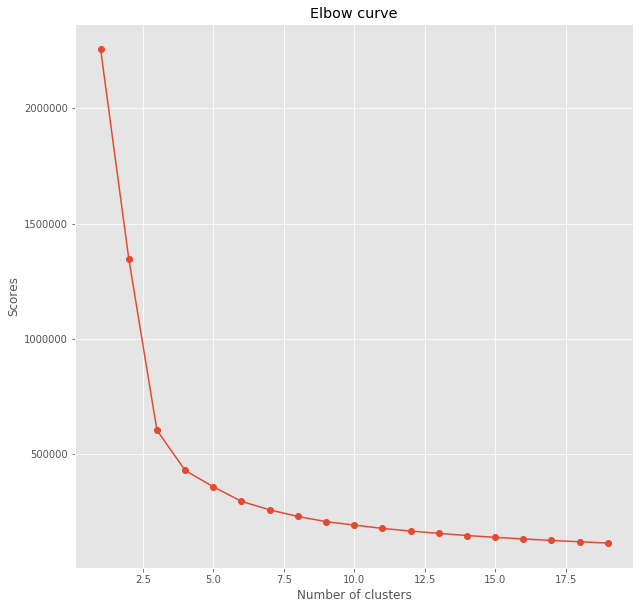

In [21]:
plt.figure(figsize=(10,10))
plt.plot(n_clusters, scores, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Scores')
plt.title('Elbow curve')

In [22]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(trans_df)
predicted = kmeans.predict(trans_df)

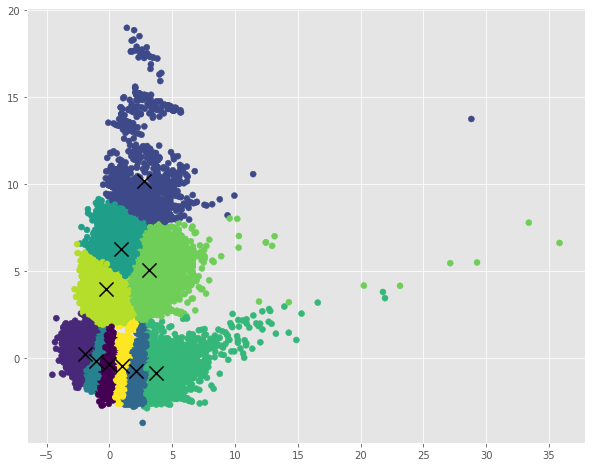

In [23]:
plt.figure(figsize=(10,8))
plt.scatter(trans_df[:,0], trans_df[:,1], c=predicted)
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:, 1], c='Black', marker='x', s=200)
plt.show()